In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import math

In [2]:
# Importing the dataset

df=pd.read_csv("Iris.csv")


In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# Importing libraries for decision tree

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [6]:
string_to_int= preprocessing.LabelEncoder() #converts the categorical variables to integers 
df=df.apply(string_to_int.fit_transform) 


In [7]:
data_feature_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df[data_feature_cols ] 
y = df.Species


In [8]:
#Training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 


In [9]:
from sklearn.tree import DecisionTreeClassifier 
model =DecisionTreeClassifier(criterion="entropy", random_state=100) 
model.fit(X_train, y_train)
y_pred= model.predict(X_test) 


In [10]:
#Actual and Predicted Score
from sklearn.metrics import accuracy_score
data_compared=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}) 


In [11]:
from sklearn.metrics import classification_report, confusion_matrix 


In [12]:
#confusion Matrix

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred)) 


[[12  0  0]
 [ 0 18  0]
 [ 0  2 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95        18
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



[Text(0.4583333333333333, 0.9166666666666666, 'PetalLengthCm <= 8.5\nentropy = 1.581\nsamples = 105\nvalue = [38, 32, 35]\nclass = Iris-setosa'),
 Text(0.375, 0.75, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = Iris-setosa'),
 Text(0.5416666666666666, 0.75, 'PetalWidthCm <= 13.5\nentropy = 0.999\nsamples = 67\nvalue = [0, 32, 35]\nclass = Iris-virginica'),
 Text(0.25, 0.5833333333333334, 'PetalWidthCm <= 10.5\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-versicolor'),
 Text(0.16666666666666666, 0.4166666666666667, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21, 0]\nclass = Iris-versicolor'),
 Text(0.3333333333333333, 0.4166666666666667, 'SepalWidthCm <= 5.0\nentropy = 0.779\nsamples = 13\nvalue = [0, 10, 3]\nclass = Iris-versicolor'),
 Text(0.16666666666666666, 0.25, 'SepalLengthCm <= 18.5\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]

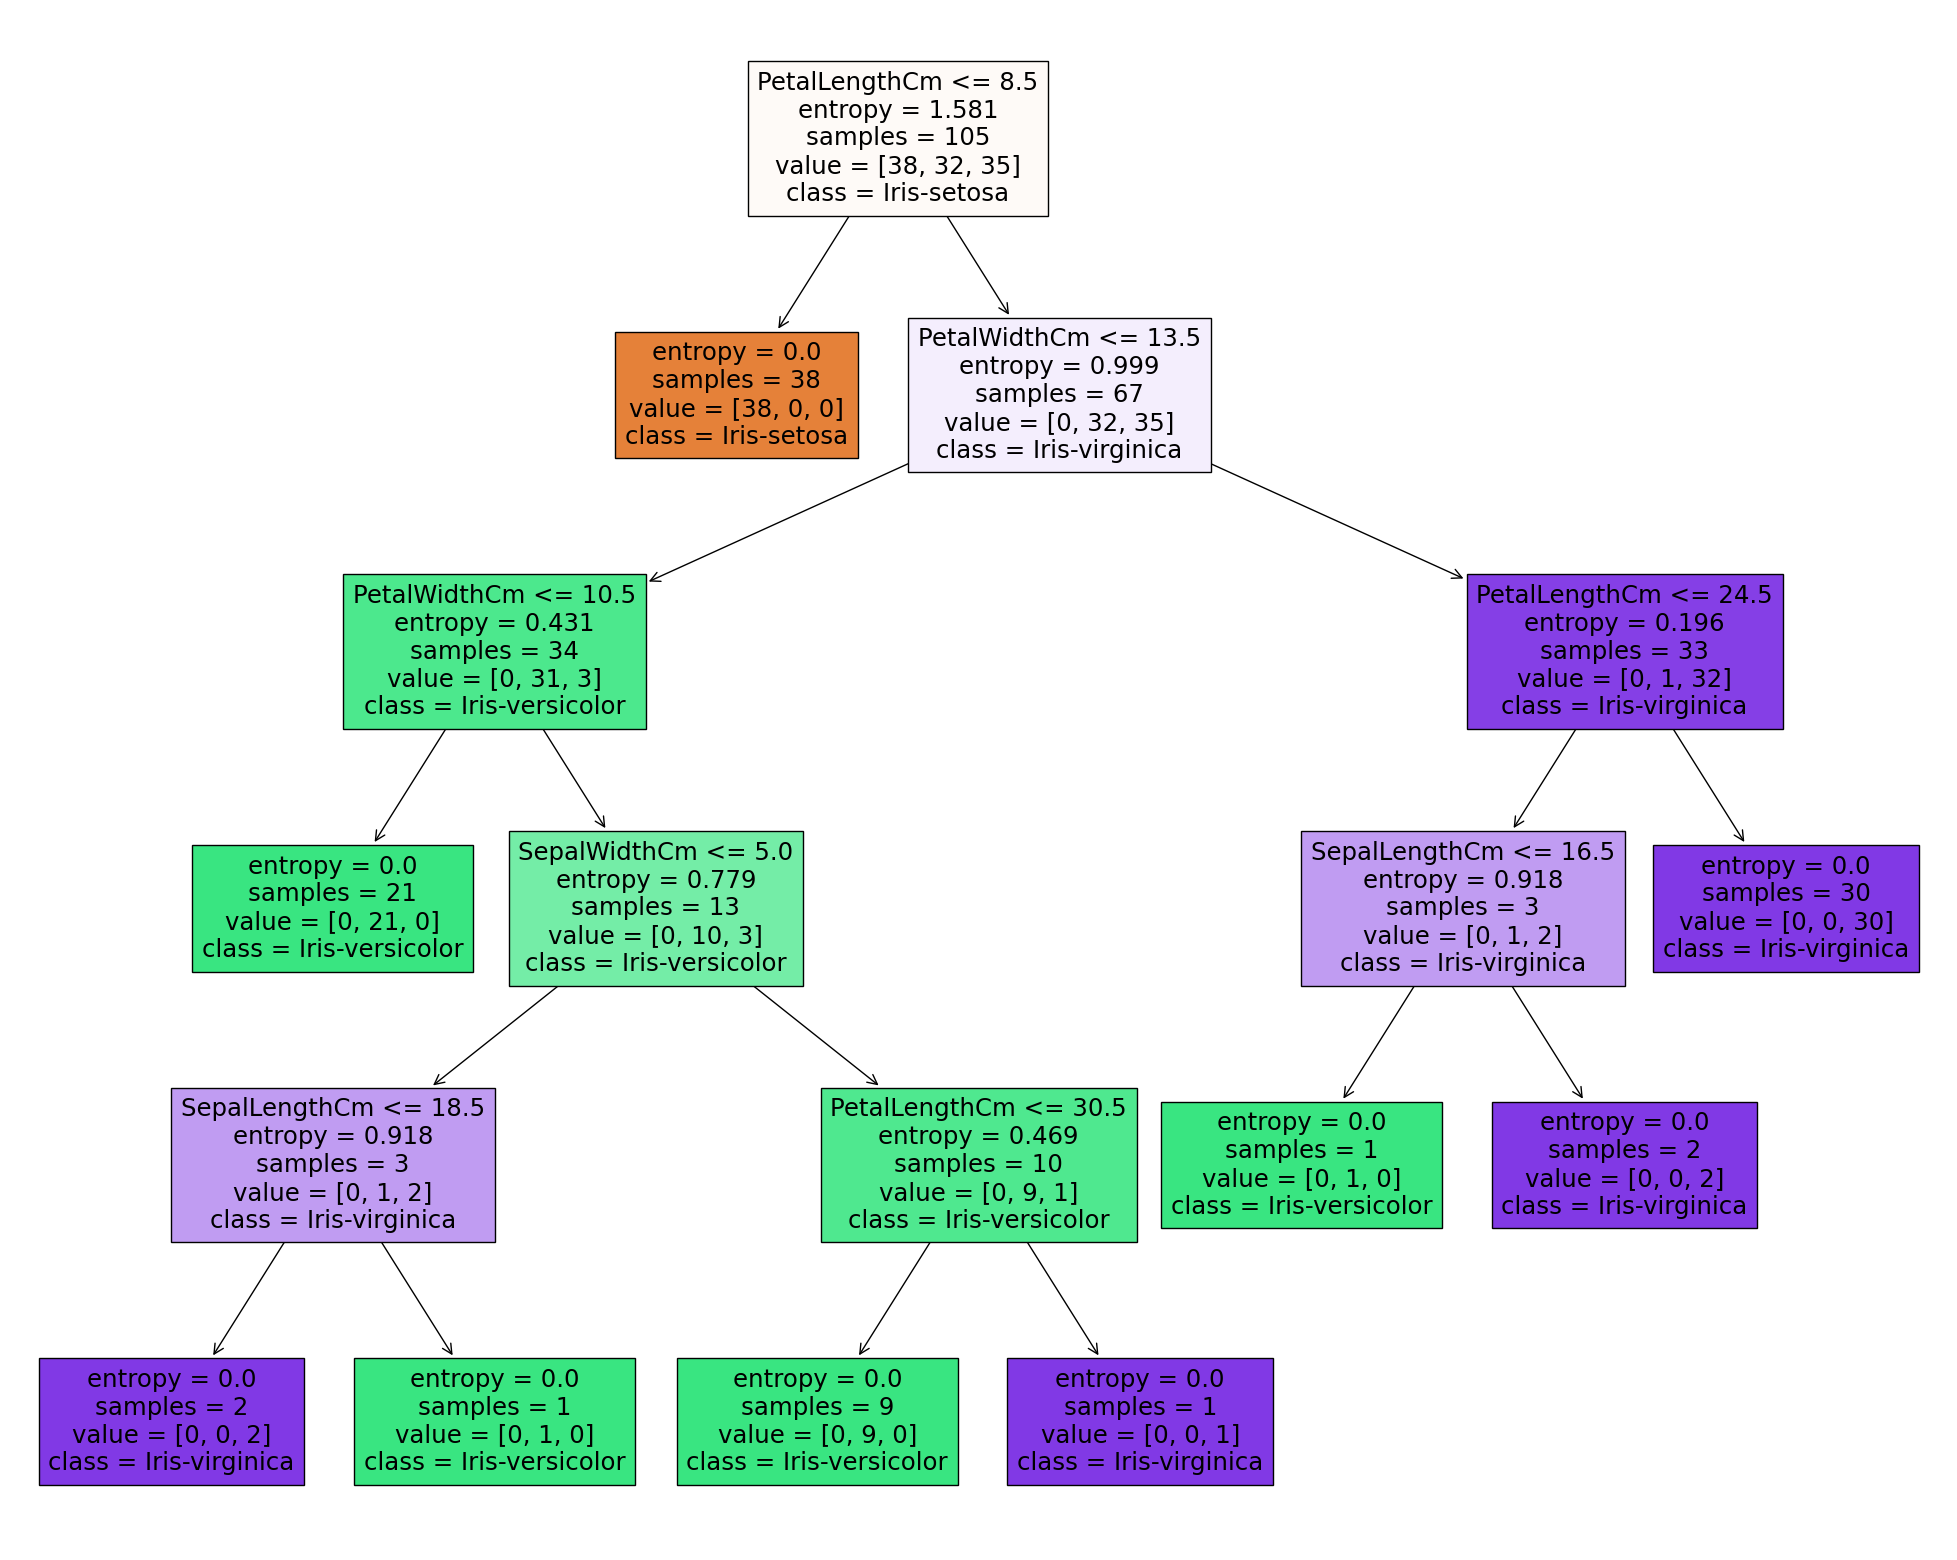

In [14]:
#DECISION TREE

from matplotlib import pyplot as plt
figure= plt.figure(figsize=(25,20))
tree.plot_tree(model,feature_names=data_feature_cols,class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],filled=True)